<a href="https://colab.research.google.com/github/Saranyanv/test/blob/master/455_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://catalog.data.gov/dataset/air-quality-measures-on-the-national-environmental-health-tracking-network

In [0]:
import os 
import numpy as np
import zipfile
from tqdm import tqdm
from pandas import DataFrame
import pandas as pd
import io
RANDOM_SEED = 42

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Air_Quality_Measures_on_the_National_Environmental_Health_Tracking_Network.csv to Air_Quality_Measures_on_the_National_Environmental_Health_Tracking_Network.csv


In [0]:
TX_Air_Quality = pd.read_csv(io.StringIO(uploaded['Air_Quality_Measures_on_the_National_Environmental_Health_Tracking_Network.csv'].decode('utf-8')), sep = ',')

In [0]:
TX_Air_Quality.head()

In [5]:
TX_Air_Quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15651 entries, 0 to 15650
Data columns (total 14 columns):
MeasureId              15651 non-null int64
MeasureName            15651 non-null object
MeasureType            15651 non-null object
StratificationLevel    15651 non-null object
StateFips              15651 non-null int64
StateName              15651 non-null object
CountyFips             15651 non-null int64
CountyName             15651 non-null object
ReportYear             15651 non-null int64
Value                  15651 non-null float64
Unit                   15651 non-null object
UnitName               15651 non-null object
DataOrigin             15651 non-null object
MonitorOnly            15651 non-null int64
dtypes: float64(1), int64(5), object(8)
memory usage: 1.7+ MB


In [6]:
print('Shape of the TX_Air_Quality: Rows, Columns')
TX_Air_Quality.shape

Shape of the TX_Air_Quality: Rows, Columns


(15651, 14)

In [7]:
print('Descriptive statistics of the TX Air Quality DataFrame:')
print(TX_Air_Quality.describe())

Descriptive statistics of the TX Air Quality DataFrame:
          MeasureId  StateFips    CountyFips    ReportYear         Value  \
count  15651.000000    15651.0  15651.000000  15651.000000  1.565100e+04   
mean     271.514536       48.0  48251.270654   2005.981790  6.240624e+05   
std       64.838468        0.0    145.811875      3.288316  7.360461e+06   
min       83.000000       48.0  48001.000000   1999.000000  0.000000e+00   
25%      292.000000       48.0  48127.000000   2003.000000  0.000000e+00   
50%      294.000000       48.0  48247.000000   2006.000000  0.000000e+00   
75%      295.000000       48.0  48375.000000   2009.000000  9.154004e+00   
max      296.000000       48.0  48507.000000   2013.000000  2.466825e+08   

        MonitorOnly  
count  15651.000000  
mean       0.194173  
std        0.395575  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  


In [0]:
TX_Air_Quality_big4 = TX_Air_Quality.loc[(TX_Air_Quality['CountyName'].isin(['Austin', 'Dallas', 'Houston', 'Bexar'])) & (TX_Air_Quality['ReportYear'] >= 2003) & (TX_Air_Quality['ReportYear'] <= 2011) & (TX_Air_Quality['MeasureId'] == 296) & (TX_Air_Quality['UnitName'] == 'Micograms per cubic meter')]

In [0]:
TX_Air_Quality_big4.head()

In [0]:
#sfo_air_traffic_big4['Airline'] = 'United Airlines'

In [0]:
#sfo_air_traffic_big4.loc[sfo_air_traffic_big4['Published Airline IATA Code'].isin(['AA', 'B6', 'DL']), 'Airline'] = 'Other Carriers'

In [0]:
sfo_air_traffic_big4_agg=DataFrame({'Air Quality Measure' : TX_Air_Quality_big4.groupby(['CountyName', 'ReportYear'])['Value'].sum()}).reset_index()

In [0]:
#sfo_air_traffic_AA_UA['Activity Period Formatted']=pd.to_datetime(sfo_air_traffic_AA_UA['Activity Period'], format='%Y%m')

In [0]:
#sfo_EK_Enplane_air_traffic = sfo_air_traffic.loc[(sfo_air_traffic['Published Airline IATA Code'].isin(['AA', 'UA', 'DL'])) & (sfo_air_traffic['Activity Period'] >= 201500) & (sfo_air_traffic['Activity Type Code'] == 'Deplaned') & (sfo_air_traffic['Terminal'] == 'International')]

In [0]:
#sfo_air_traffic.loc[(sfo_air_traffic['Published Airline IATA Code'].isin(['AA', 'UA', 'B6', 'DL'])) & (sfo_air_traffic['Activity Period'] >= 201501) & (sfo_air_traffic['Activity Type Code'] == 'Enplaned')].groupby(['Published Airline IATA Code', 'Activity Period'])['Passenger Count'].sum()

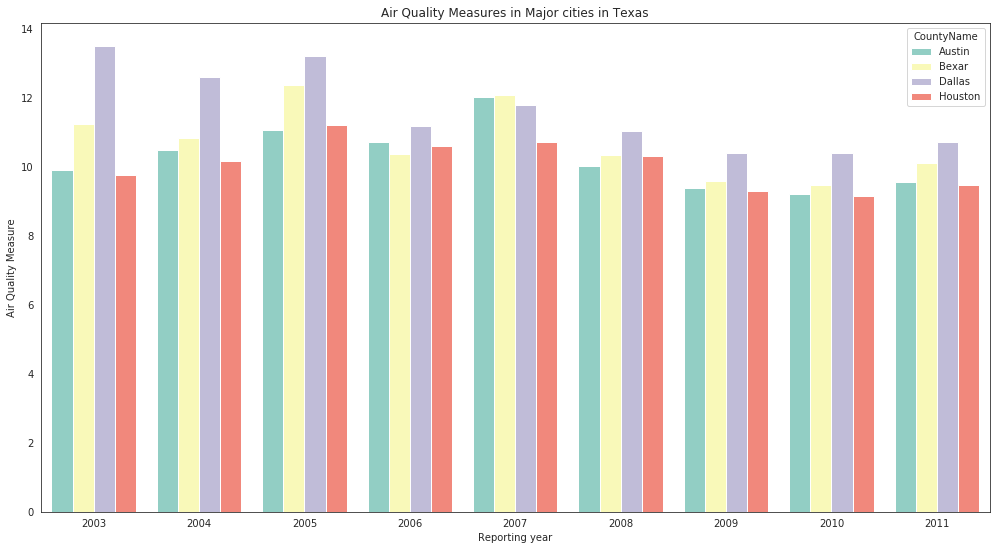

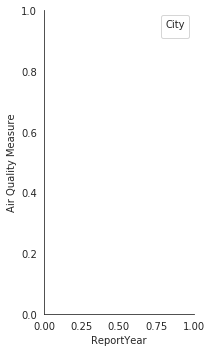

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")

fig, ax = plt.subplots(figsize=(17,9))
g = sns.catplot(x="ReportYear", y="Air Quality Measure", hue="CountyName", data=sfo_air_traffic_big4_agg,
                kind="bar"#, palette=sns.color_palette(palette = ["SteelBlue" , "Salmon", "Grey", "Cyan"])
                , palette="Set3"
                , legend=False, ax=ax, aspect=.6, saturation=.85)

ax.set_title('Air Quality Measures in Major cities in Texas')
ax.set_xlabel('Reporting year')

plt.legend(title='City', loc='upper right', labels=['Austin', 'San Antonio', 'Dallas', 'Houston'])
plt.show(g)

[[Text(0, 0, 'Austin'),
  Text(0, 0, 'San Antonio'),
  Text(0, 0, 'Dallas'),
  Text(0, 0, 'Houston')]]

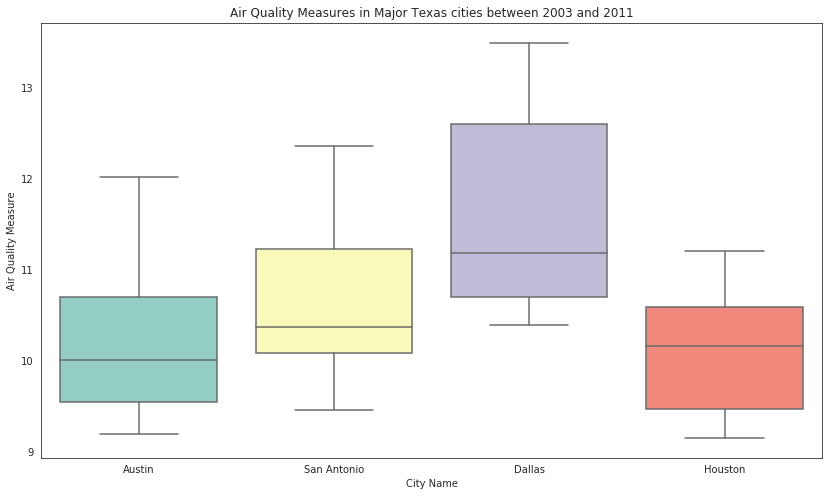

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")

fig, ax = plt.subplots(figsize=(14,8))
ax = sns.boxplot(y="Air Quality Measure", x="CountyName", data=sfo_air_traffic_big4_agg
                #, palette=sns.color_palette(palette = ["SteelBlue" , "Salmon", "Grey", "Cyan"])
                , palette="Set3", saturation=.85)
ax.set_title('Air Quality Measures in Major Texas cities between 2003 and 2011')
ax.set_xlabel('City Name')
ax.set(xticklabels=['Austin', 'San Antonio', 'Dallas', 'Houston'])